# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Generating **Data**

In [2]:
def gen_data(n_samples):
  np.random.seed(42)
  X = 2 * np.random.rand(n_samples,1)
  y = 4 + 3*X + np.random.randn(n_samples,1)
  return X , y

X , y = gen_data(200)

In [3]:
print(f'This is my X : \n {X.T}')
print(f'This is my y : \n {y.T}.')


This is my X : 
 [[0.74908024 1.90142861 1.46398788 1.19731697 0.31203728 0.31198904
  0.11616722 1.73235229 1.20223002 1.41614516 0.04116899 1.9398197
  1.66488528 0.42467822 0.36364993 0.36680902 0.60848449 1.04951286
  0.86389004 0.58245828 1.22370579 0.27898772 0.5842893  0.73272369
  0.91213997 1.57035192 0.39934756 1.02846888 1.18482914 0.09290083
  1.2150897  0.34104825 0.13010319 1.89777107 1.93126407 1.6167947
  0.60922754 0.19534423 1.36846605 0.88030499 0.24407647 0.99035382
  0.06877704 1.8186408  0.51755996 1.32504457 0.62342215 1.04013604
  1.09342056 0.36970891 1.93916926 1.55026565 1.87899788 1.7896547
  1.19579996 1.84374847 0.176985   0.39196572 0.09045458 0.65066066
  0.77735458 0.54269806 1.65747502 0.71350665 0.56186902 1.08539217
  0.28184845 1.60439396 0.14910129 1.97377387 1.54448954 0.39743136
  0.01104423 1.63092286 1.41371469 1.45801434 1.54254069 0.1480893
  0.71693146 0.23173812 1.72620685 1.24659625 0.66179605 0.1271167
  0.62196464 0.65036664 1.45921236 1

# Building the **Cost Function**

In [8]:
def cost_func(W , b , y , X):
  m = len(y)
  ŷ = X.dot(W) + b
  cost = (1/(2 * m )) * np.sum((y - ŷ)** 2)

  return cost

# **Gradient Decscent**

In [22]:
def gradient_descent(W , b , cost , alpha , itr , X ,y ):
  m = len(y)
  cost_his = []
  for i in range(itr):
    pred = X.dot(W) + b
    dw = (1/m) * np.dot(X.T , (pred - y))
    db = (1/m) * np.sum(pred - y)

    W = W - alpha*dw
    b = b - alpha*db

    cost = cost_func(W , b , y , X)
    cost_his.append(cost)

    if i % 10 == 0:
      print(f'iteration {i} : Cost {cost} | params : W : {W} , b : {b}')

  print('final parameters : ')
  print(f'W : {W}')
  print(f'b : {b}')
  print(f'cost : {cost}')
  return W , b , cost_his

#Training the model

In [50]:
W = np.zeros((1,1))
b = 0
learning_rate = 0.1
iterations = 100

print(f'W shape : {W.shape}')


W , b , cost_history = gradient_descent(W , b , cost_func , learning_rate , iterations , X , y)

W shape : (1, 1)
iteration 0 : Cost 16.537464551002454 | params : W : [[0.77732556]] , b : 0.6971451666926051
iteration 10 : Cost 0.6807031850755941 | params : W : [[3.32799814]] , b : 3.132692353014397
iteration 20 : Cost 0.5239937431721551 | params : W : [[3.47718453]] , b : 3.4574050759385995
iteration 30 : Cost 0.5071569026624156 | params : W : [[3.41775067]] , b : 3.572077965808381
iteration 40 : Cost 0.49586069542960176 | params : W : [[3.35016705]] , b : 3.6545040901559336
iteration 50 : Cost 0.4877402656005982 | params : W : [[3.29125586]] , b : 3.7230494338790194
iteration 60 : Cost 0.4818978355023556 | params : W : [[3.24113973]] , b : 3.7810645787955903
iteration 70 : Cost 0.4776943224952831 | params : W : [[3.19861663]] , b : 3.830262612457872
iteration 80 : Cost 0.47466997758968144 | params : W : [[3.16254635]] , b : 3.8719923817325577
iteration 90 : Cost 0.47249402093020443 | params : W : [[3.13195064]] , b : 3.9073883847397
final parameters : 
W : [[3.10840589]]
b : 3.93

# Ploting results

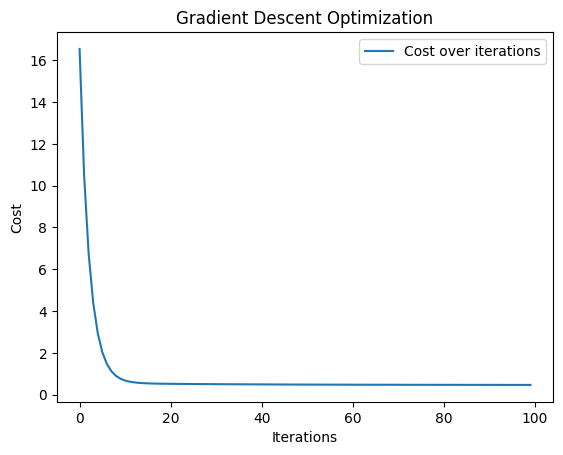

In [51]:
plt.plot(range(len(cost_history)), cost_history, label='Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.show()

# Predictions

In [52]:
def pred(X,W,b):

 return X.dot(W)+b

print(W)

print(f'W shape : {W.shape}')
print(f'b shape : {b.shape}')

X_test = np.array([[1.5]])
print(f'X_test shpe {X_test.shape}')
print(X_test)
y_pred = pred(X_test,W,b)
print(y_pred)
print(f"Prediction for X=1.5: {y_pred[0][0]}")

[[3.10840589]]
W shape : (1, 1)
b shape : ()
X_test shpe (1, 1)
[[1.5]]
[[8.59723599]]
Prediction for X=1.5: 8.597235985696328


In [53]:
def rmse(y,y_pred):
  return np.sqrt(np.mean((y-y_pred)**2))


print("RMSE" , rmse(y,pred(X,W,b)))

def R2(y,y_pred):
  return 1 - (np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2))

print("R2" , R2(y,pred(X,W,b)))

RMSE 0.970631608116282
R2 0.762583050455249
